In [ ]:
import tensorflow as tf
import os
import cv2
from matplotlib import pyplot as plt
from PIL import Image

In [ ]:
# Menghubungkan Google Colab dengan Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Menentukan Direktori
base_dir = '/content/drive/My Drive/Data/'

# Menampilkan Isi Direktori
!ls "/content/drive/My Drive/Data"

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
LAKI-LAKI  PEREMPUAN


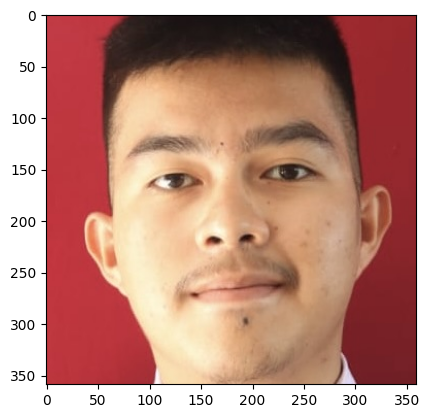

In [ ]:
# Menampilkan salah satu gambar dari Folder 'LAKI-LAKI'

img_path = os.path.join(base_dir, 'LAKI-LAKI', '11S23004_Rudi Alva Jonathan Ginting.jpg')
imgL = cv2.imread(img_path)
plt.imshow(cv2.cvtColor(imgL, cv2.COLOR_BGR2RGB))
plt.show()

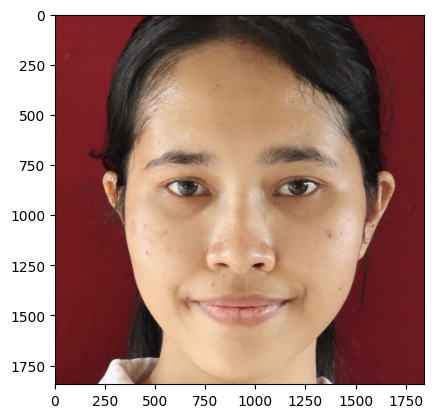

In [ ]:
# Menampilkan salah satu gambar dari Folder 'PEREMPUAN'

img_path = os.path.join(base_dir, 'PEREMPUAN', '11S23006_Sri Intan Ivana Pasaribu.jpg')
imgL = cv2.imread(img_path)
plt.imshow(cv2.cvtColor(imgL, cv2.COLOR_BGR2RGB))
plt.show()

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import tensorflow as tf

In [ ]:
data = tf.keras.utils.image_dataset_from_directory(base_dir)

Found 345 files belonging to 2 classes.


In [ ]:
data_iterator = data.as_numpy_iterator()

In [ ]:
def load_images(image_directory):
    images = []
    for filename in os.listdir(image_directory):
        if filename.lower().endswith(('.jpg', '.jpeg', '.png')):  # Handles various image formats
            try:
                img = Image.open(os.path.join(image_directory, filename))
                img.verify()  # Verifies that it's a valid image
                images.append(img)
            except (IOError, SyntaxError) as e:
                print('Bad file:', filename)  # Print out the names of corrupt files
    return images

In [ ]:
batch = next(data_iterator)

InvalidArgumentError: {{function_node __wrapped__IteratorGetNext_output_types_2_device_/job:localhost/replica:0/task:0/device:CPU:0}} Unknown image file format. One of JPEG, PNG, GIF, BMP required.
	 [[{{node decode_image/DecodeImage}}]] [Op:IteratorGetNext] name: 

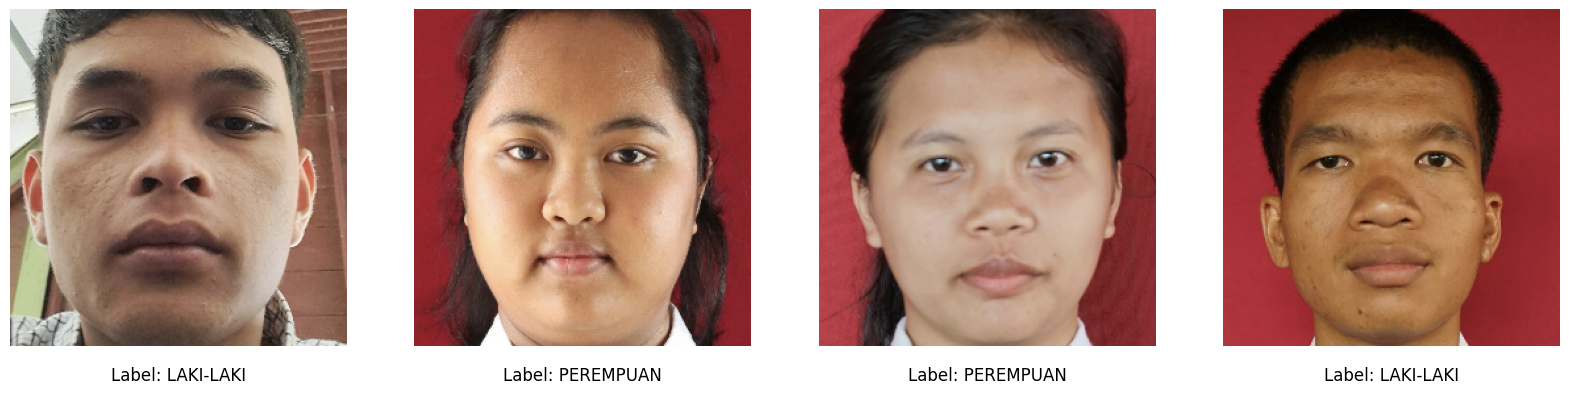

In [ ]:
class_names = data.class_names  # Ambil nama kelas dari dataset

# Menampilkan beberapa gambar dari batch
fig, axes = plt.subplots(ncols=4, figsize=(20, 20))
for idx, ax in enumerate(axes.flat):
    image = batch[0][idx].astype(np.uint8)
    label_numeric = batch[1][idx]  # Label numerik

    ax.imshow(image)
    ax.axis('off')
    ax.text(0.5, -0.1, f'Label: {class_names[label_numeric]}', color='black', fontsize=12, ha='center', transform=ax.transAxes)

plt.show()

KONTRAS (JANGAN DI RUN)

In [ ]:
import cv2
import numpy as np
import os
from skimage.measure import shannon_entropy
import matplotlib.pyplot as plt

# menghitung kontras
def calculate_contrast(image):
    return np.std(image)

In [ ]:
# mengumpulkan statistik dari gambar di direktori
def gather_statistics(directory):
    contrasts = []

    for root, dirs, files in os.walk(directory):
        for filename in files:
            if filename.lower().endswith((".jpg", ".png", ".jpeg")):
                image_path = os.path.join(root, filename)
                image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

                if image is None:
                    continue

                contrasts.append(calculate_contrast(image))

    return contrasts


In [ ]:

image_directory = '/content/drive/My Drive/Data'
contrasts = gather_statistics(image_directory)


In [ ]:
# Menghitung statistik deskriptif untuk kontras
contrast_mean = np.mean(contrasts)
contrast_median = np.median(contrasts)
contrast_std = np.std(contrasts)

print(f"Contrast - Mean: {contrast_mean}, Median: {contrast_median}, Std: {contrast_std}")


Contrast - Mean: 51.820018032025516, Median: 53.00326048519369, Std: 10.798548892825975


In [ ]:
# Berfungsi untuk menentukan apakah suatu gambar memerlukan CLAHE
def needs_clahe(image, contrast_threshold):
    contrast = calculate_contrast(image)
    return contrast < contrast_threshold


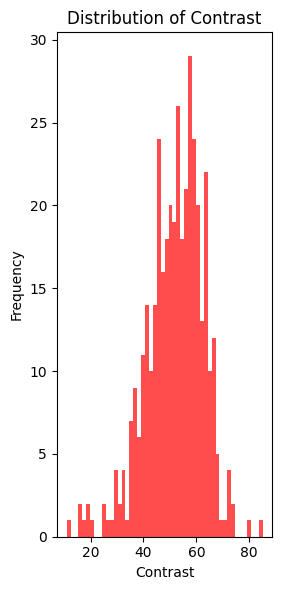

In [ ]:
# Plot histogram untuk distribusi kontras
plt.figure(figsize=(8, 6))


plt.subplot(1, 3, 3)
plt.hist(contrasts, bins=50, color='red', alpha=0.7)
plt.title('Distribution of Contrast')
plt.xlabel('Contrast')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


In [ ]:
# Directory to save processed images
processed_images_dir = '/content/drive/My Drive/Data-clahe'

In [ ]:
# Function to display original and processed images with statistics
def display_images(original, processed, original_std, processed_std, title='Processed Image'):
    fig, axs = plt.subplots(2, 2, figsize=(8, 6))

    # Original image
    axs[0, 0].imshow(cv2.cvtColor(original, cv2.COLOR_BGR2RGB))
    axs[0, 0].set_title('Original Image')
    axs[0, 0].axis('off')

    # Processed image
    axs[0, 1].imshow(processed, cmap='gray')
    axs[0, 1].set_title(title)
    axs[0, 1].axis('off')

    # Original image stats
    axs[1, 0].text(0.5, 0.5, f"Standard Deviation: {original_std:.2f}",
                   horizontalalignment='center', verticalalignment='center', fontsize=12)
    axs[1, 0].set_title('Original Image Stats')
    axs[1, 0].axis('off')

    # Processed image stats
    axs[1, 1].text(0.5, 0.5, f"Standard Deviation: {processed_std:.2f}",
                   horizontalalignment='center', verticalalignment='center', fontsize=12)
    axs[1, 1].set_title('Processed Image Stats')
    axs[1, 1].axis('off')

    plt.tight_layout()
    plt.show()


In [ ]:
import shutil

def process_directory(directory, contrast_threshold):
    if not os.path.exists(processed_images_dir):
        os.makedirs(processed_images_dir)
        print(f"Created directory: {processed_images_dir}")

    print(f"Processing directory: {directory}")
    sample_contrast = False

    for root, dirs, files in os.walk(directory):
        for filename in files:
            if filename.lower().endswith((".jpg", ".png", ".jpeg")):
                image_path = os.path.join(root, filename)
                image = cv2.imread(image_path)

                if image is None:
                    print(f"Failed to load image: {filename}")
                    continue

                gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
                original_std = calculate_contrast(gray_image)
                needs_contrast = needs_clahe(gray_image, contrast_threshold)

                if needs_contrast:
                    processed_image = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8)).apply(gray_image)
                    title = 'Processed Image (CLAHE)'
                    print(f"Image {filename} needs CLAHE.")
                    if not sample_contrast:
                        processed_std = calculate_contrast(processed_image)
                        display_images(image, processed_image, original_std, processed_std, title=title)
                        sample_contrast = True

                    # Buat subdirektori terkait di direktori baru
                    relative_path = os.path.relpath(root, directory)
                    new_subdir = os.path.join(processed_images_dir, relative_path)
                    if not os.path.exists(new_subdir):
                        os.makedirs(new_subdir)

                    save_path = os.path.join(new_subdir, filename)
                    cv2.imwrite(save_path, processed_image)
                    print(f"Image {filename} processed and saved to {save_path}")

                    # Menghapus gambar originalk
                    os.remove(image_path)
                    print(f"Image {filename} removed from original directory.")
                else:
                    # Menyalin gambar
                    relative_path = os.path.relpath(root, directory)
                    new_subdir = os.path.join(processed_images_dir, relative_path)
                    if not os.path.exists(new_subdir):
                        os.makedirs(new_subdir)
                    save_path = os.path.join(new_subdir, filename)
                    shutil.copyfile(image_path, save_path)
                    print(f"Image {filename} does not need processing and is copied to {save_path}")
            else:
                print(f"Skipped file: {filename}")


Created directory: /content/drive/My Drive/Data-clahe
Processing directory: /content/drive/My Drive/Data
Image 11S23015_Ayu Hutasoit_Pencahayaan Kurang.jpg does not need processing and is copied to /content/drive/My Drive/Data-clahe/PEREMPUAN/11S23015_Ayu Hutasoit_Pencahayaan Kurang.jpg
Image 12S23050_Yolanda Septania Saragih_Pencahayaan Kurang.jpg does not need processing and is copied to /content/drive/My Drive/Data-clahe/PEREMPUAN/12S23050_Yolanda Septania Saragih_Pencahayaan Kurang.jpg
Image 11S23042_Tasya Aprilda Marbun_Pencahayaan Normal.jpg does not need processing and is copied to /content/drive/My Drive/Data-clahe/PEREMPUAN/11S23042_Tasya Aprilda Marbun_Pencahayaan Normal.jpg
Image 11323050_Feby Revalia Manalu_Pencahayaan Normal.jpg does not need processing and is copied to /content/drive/My Drive/Data-clahe/PEREMPUAN/11323050_Feby Revalia Manalu_Pencahayaan Normal.jpg
Image 11S23048_Iel Oceline Manik.jpg does not need processing and is copied to /content/drive/My Drive/Data-c

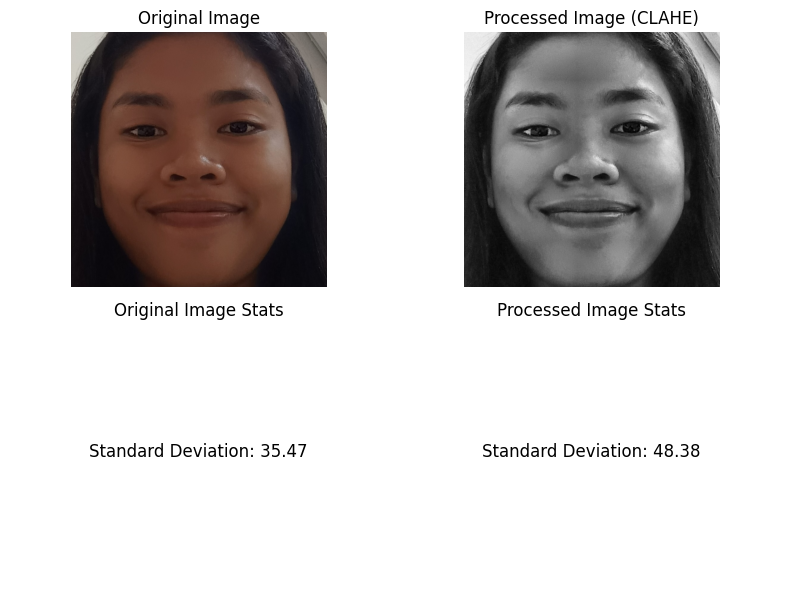

Image 22S23014_Indri Yani Br Simbolon_Pencahayaan Kurang.jpg processed and saved to /content/drive/My Drive/Data-clahe/PEREMPUAN/22S23014_Indri Yani Br Simbolon_Pencahayaan Kurang.jpg
Image 22S23014_Indri Yani Br Simbolon_Pencahayaan Kurang.jpg removed from original directory.
Image 22S23015_Christin Elisabeth Theresya Siregar_Pencahayaan Normal.jpg does not need processing and is copied to /content/drive/My Drive/Data-clahe/PEREMPUAN/22S23015_Christin Elisabeth Theresya Siregar_Pencahayaan Normal.jpg
Image 11323059_Tasya Simamora.jpg does not need processing and is copied to /content/drive/My Drive/Data-clahe/PEREMPUAN/11323059_Tasya Simamora.jpg
Image 11S23051_Yuri Pakpahan_Pencahayaan Kurang.jpg does not need processing and is copied to /content/drive/My Drive/Data-clahe/PEREMPUAN/11S23051_Yuri Pakpahan_Pencahayaan Kurang.jpg
Image 11423086_Dera Kogoya_Pencahayaan Kurang.jpg does not need processing and is copied to /content/drive/My Drive/Data-clahe/PEREMPUAN/11423086_Dera Kogoya_P

In [ ]:
# Ambang batas untuk menentukan kebutuhan CLAHE berdasarkan analisis statistik
contrast_threshold = contrast_mean - contrast_std

# Periksa apakah direktori ada dan proses gambar
if not os.path.isdir(image_directory):
    print(f"Directory {image_directory} does not exist.")
else:
    process_directory(image_directory, contrast_threshold)


***SPLITTING DATA***

In [ ]:
import os
import random
import shutil

# Berfungsi untuk membagi dataset menjadi set pelatihan dan pengujian
def splitting_data(dataset, train, test, train_ratio):
# Pastikan direktori pelatihan dan pengujian ada
    os.makedirs(train, exist_ok=True)
    os.makedirs(test, exist_ok=True)

    # Daftar direktori saat ini
    files = [f for f in os.listdir(dataset) if f.lower().endswith(('.jpeg', '.jpg', '.png'))]
    total_size = len(files)
    train_size = int(train_ratio * total_size)
    test_size = total_size - train_size

    # Shuffle files randomly
    random.shuffle(files)
    train_files = files[:train_size]
    test_files = files[train_size:]

    # Menyalin file ke folder train dan test
    for file in train_files:
        src = os.path.join(dataset, file)
        dst = os.path.join(train, file)
        shutil.copyfile(src, dst)
    for file in test_files:
        src = os.path.join(dataset, file)
        dst = os.path.join(test, file)
        shutil.copyfile(src, dst)

dataset_dir = '/content/drive/My Drive/Data-clahe'
train_dir = '/content/drive/My Drive/Data-train'
test_dir = '/content/drive/My Drive/Data-test'

# Membuat subdirektori
laki_dir = os.path.join(dataset_dir, 'LAKI-LAKI')
train_laki = os.path.join(train_dir, 'LAKI-LAKI')
test_laki = os.path.join(test_dir, 'LAKI-LAKI')

perempuan_dir = os.path.join(dataset_dir, 'PEREMPUAN')
train_perempuan = os.path.join(train_dir, 'PEREMPUAN')
test_perempuan = os.path.join(test_dir, 'PEREMPUAN')

# Train rasio data
train_ratio = 0.9

# Pembagian data untuk LAKI-LAKI
splitting_data(laki_dir, train_laki, test_laki, train_ratio)

# Pembagian data untuk PEREMPUAN
splitting_data(perempuan_dir, train_perempuan, test_perempuan, train_ratio)

# Tampilkan hasil pembagian data
print('Jumlah Total Laki-Laki: ', len(os.listdir(laki_dir)))
print('Jumlah Data Train Laki-Laki: ', len(os.listdir(train_laki)))
print('Jumlah Data Test Laki-Laki: ', len(os.listdir(test_laki)))
print()
print('Jumlah Total Perempuan: ', len(os.listdir(perempuan_dir)))
print('Jumlah Data Train Perempuan: ', len(os.listdir(train_perempuan)))
print('Jumlah Data Test Perempuan: ', len(os.listdir(test_perempuan)))


Jumlah Total Laki-Laki:  200
Jumlah Data Train Laki-Laki:  180
Jumlah Data Test Laki-Laki:  20

Jumlah Total Perempuan:  200
Jumlah Data Train Perempuan:  180
Jumlah Data Test Perempuan:  20


AUGMENTASI (JANGAN DI RUN)

In [ ]:
# Import Library
import os
import cv2
from google.colab import drive

def augmentasi_citra(image, rotation_degrees):
    rows, cols, _ = image.shape
    M = cv2.getRotationMatrix2D((cols/2, rows/2), rotation_degrees, 1)
    rotated_image = cv2.warpAffine(image, M, (cols, rows))
    return rotated_image

def augmentasi_flip_horizontal(image):
    flipped_horizontally = cv2.flip(image, 1)
    return flipped_horizontally

def augmentasi_citra_height_shift(image, shift_fraction):
    rows, cols, _ = image.shape
    M = np.float32([[1, 0, 0], [0, 1, shift_fraction * rows]])
    shifted_image = cv2.warpAffine(image, M, (cols, rows))
    return shifted_image

def main():
    # Update path untuk mengakses Google Drive
    dataset_dir = '/content/drive/My Drive/Data-train'
    augmented_dataset_dir = '/content/drive/My Drive/Data-augmentasi'
    os.makedirs(augmented_dataset_dir, exist_ok=True)

    for imageClass in os.listdir(dataset_dir):
        class_dir = os.path.join(augmented_dataset_dir, imageClass)
        os.makedirs(class_dir, exist_ok=True)
        class_path = os.path.join(dataset_dir, imageClass)
        if os.path.isdir(class_path):
            for image_file in os.listdir(class_path):
                image_path = os.path.join(class_path, image_file)
                img = cv2.imread(image_path)
                if img is not None:
                    # Menyimpan gambar original
                    cv2.imwrite(os.path.join(class_dir, f'original_{image_file}'), img)

                    # Simpan gambar diputar 15 derajat (dua arah)
                    augmented_img_15_left = augmentasi_citra(img, 15)
                    augmented_img_15_right = augmentasi_citra(img, -15)
                    cv2.imwrite(os.path.join(class_dir, f'left_15_{image_file}'), augmented_img_15_left)
                    cv2.imwrite(os.path.join(class_dir, f'right_15_{image_file}'), augmented_img_15_right)

                    # Simpan gambar yang digeser ketinggiannya (atas dan bawah)
                    augmented_img_shift_up = augmentasi_citra_height_shift(img, 0.1)
                    augmented_img_shift_down = augmentasi_citra_height_shift(img, -0.1)
                    cv2.imwrite(os.path.join(class_dir, f'shift_up_{image_file}'), augmented_img_shift_up)
                    cv2.imwrite(os.path.join(class_dir, f'shift_down_{image_file}'), augmented_img_shift_down)

                    # Simpan gambar yang dibalik secara horizontal
                    flipped_horizontal = augmentasi_flip_horizontal(img)
                    cv2.imwrite(os.path.join(class_dir, f'horizontal_flip_{image_file}'), flipped_horizontal)

if __name__ == "__main__":
    main()


In [ ]:
# Rename file gambar yang sudah di augmentasi
import os

def rename_files(folder_path):
    for root, dirs, files in os.walk(folder_path):
        for file_name in files:
            if not file_name.endswith("_augmented"):
                original_path = os.path.join(root, file_name)
                new_file_name = file_name.split('.')[0] + "_augmented." + file_name.split('.')[1]
                new_path = os.path.join(root, new_file_name)

                # Jika nama file sudah ada, tambahkan nomor unik
                count = 1
                while os.path.exists(new_path):
                    new_file_name = file_name.split('.')[0] + f"augmented{count}." + file_name.split('.')[1]
                    new_path = os.path.join(root, new_file_name)
                    count += 1

                os.rename(original_path, new_path)

def main():
    augmented_dataset_dir = 'augmentasi_data'
    rename_files(augmented_dataset_dir)

if __name__ == "__main__":
    main()

In [ ]:
import os
import cv2
from google.colab import drive

dataset_dir = '/content/drive/My Drive/Data-augmentasi'

laki_dir = os.path.join(dataset_dir, 'LAKI-LAKI')
perempuan_dir = os.path.join(dataset_dir, 'PEREMPUAN')

os.makedirs(laki_dir, exist_ok=True)
os.makedirs(perempuan_dir, exist_ok=True)

print("Jumlah data Laki-Laki: ", len(os.listdir(laki_dir)))
print("Jumlah data Perempuan: ", len(os.listdir(perempuan_dir)))

Jumlah data Laki-Laki:  1080
Jumlah data Perempuan:  1080


MODEL

In [ ]:
def extract_data_from_generator(generator, num_batches):
    data = []
    labels = []

    for _ in range(num_batches):
        batch_data, batch_labels = next(generator)
        data.extend(batch_data)
        labels.extend(batch_labels)
    return np.array(data), np.array(labels)

In [ ]:
def stratified_sampling(data, labels, batch_size):
    # Memisahkan data berdasarkan label
    male_data = [data[i] for i in range(len(labels)) if labels[i] == 0]  # Asumsi label 0 untuk laki-laki
    female_data = [data[i] for i in range(len(labels)) if labels[i] == 1]  # Asumsi label 1 untuk perempuan

    # Membuat label sesuai dengan jumlah data
    male_labels = [0] * len(male_data)
    female_labels = [1] * len(female_data)

    # Mengonversi daftar data dan label menjadi array numpy
    male_data, female_data, male_labels, female_labels = np.array(male_data), np.array(female_data), np.array(male_labels), np.array(female_labels)

    # Menentukan jumlah sampel per kategori
    samples_per_category = batch_size // 2

    # Looping untuk menghasilkan batch data secara stratified
    while len(male_data) >= samples_per_category and len(female_data) >= samples_per_category:
        # Mengambil batch data untuk laki-laki dan perempuan
        male_batch = male_data[:samples_per_category]
        female_batch = female_data[:samples_per_category]

        # Mengambil batch label untuk laki-laki dan perempuan
        male_batch_labels = male_labels[:samples_per_category]
        female_batch_labels = female_labels[:samples_per_category]

        # Menggabungkan batch data dan label
        batch_data = np.concatenate([male_batch, female_batch], axis=0)
        batch_labels = np.concatenate([male_batch_labels, female_batch_labels], axis=0)

        # Menghasilkan batch data dan label
        yield batch_data, batch_labels

        # Menghapus data yang sudah diambil dari daftar
        male_data = male_data[samples_per_category:]
        female_data = female_data[samples_per_category:]

        # Menghapus label yang sudah diambil dari daftar
        male_labels = male_labels[samples_per_category:]
        female_labels = female_labels[samples_per_category:]

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import cv2

# Inisialisasi ImageDataGenerator dengan rescaling, validation split, dan fungsi preprocessing custom
train_datagen = ImageDataGenerator(
    rescale=1./255,  # Mereskalakan nilai piksel gambar menjadi antara 0 dan 1
    validation_split=0.2,  # Menambahkan pembagian validasi untuk memisahkan 20% data pelatihan untuk validasi
)

test_datagen = ImageDataGenerator(
    rescale=1./255,  # Mereskalakan nilai piksel gambar menjadi antara 0 dan 1
)

# Menentukan jalur ke data pelatihan dan pengujian
train_dir = '/content/drive/My Drive/Data-augmentasi'
test_dir = '/content/drive/My Drive/Data-test'

# Generator data untuk pelatihan
train_generator = train_datagen.flow_from_directory(
    train_dir,  # Direktori dengan data pelatihan
    target_size=(224, 224),  # Ukuran target gambar setelah resizing
    class_mode='categorical',  # Mode klasifikasi untuk label
    subset='training'  # Menetapkan sebagai data pelatihan
)

# Generator data untuk validasi
validation_generator = train_datagen.flow_from_directory(
    train_dir,  # Direktori yang sama dengan data pelatihan
    target_size=(224, 224),  # Ukuran target gambar setelah resizing
    class_mode='categorical',  # Mode klasifikasi untuk label
    subset='validation'  # Menetapkan sebagai data validasi
)

# Generator data untuk pengujian
test_generator = test_datagen.flow_from_directory(
    test_dir,  # Direktori dengan data pengujian
    target_size=(224, 224),  # Ukuran target gambar setelah resizing
    class_mode='categorical'  # Mode klasifikasi untuk label
)



Found 1728 images belonging to 2 classes.
Found 432 images belonging to 2 classes.
Found 40 images belonging to 2 classes.


In [ ]:
import cv2
import tensorflow as tf
import tensorflow_hub as hub
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Conv2D, MaxPooling2D, Flatten, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint

# Load MobileNetV3 from TensorFlow Hub
mobilenet_v3_large_url = "https://tfhub.dev/google/imagenet/mobilenet_v3_large_100_224/feature_vector/5"
mobilenet_v3_layer = hub.KerasLayer(mobilenet_v3_large_url, input_shape=(224, 224, 3), trainable=False)

# Function to create the model with a given learning rate
def create_model(learning_rate):
    # Input for the images to MobileNetV3
    input_image = Input(shape=(224, 224, 3))

    # MobileNetV3 from TensorFlow Hub
    x = mobilenet_v3_layer(input_image)

    # Check the shape of the MobileNetV3 output
    print(f'Shape of MobileNetV3 output: {x.shape}')

    # Add some fully connected layers
    z = Dense(128, activation='relu')(x)
    output = Dense(2, activation='softmax')(z)  # Using softmax for multi-class classification

    model = Model(inputs=input_image, outputs=output)

    # Compile model
    model.compile(optimizer=Adam(learning_rate=learning_rate),
                  loss='categorical_crossentropy',  # Using categorical_crossentropy for multi-class classification
                  metrics=['accuracy'])

    return model


In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint

callbacks = [
    ModelCheckpoint('/content/drive/My Drive/model_28Juni_data_mobilenet.h5', monitor='val_accuracy', save_best_only=True)
]

In [ ]:
def extract_data_from_generator(generator, num_batches):
    all_data = []  # List untuk menyimpan semua data yang diekstraksi
    all_labels = []  # List untuk menyimpan semua label yang diekstraksi

    # Loop untuk mengambil data dari generator sebanyak num_batches
    for _ in range(num_batches):
        data, labels = next(generator)  # Mengambil batch data dan label dari generator
        all_data.extend(data)  # Menambahkan data batch ke list all_data
        all_labels.extend(labels)  # Menambahkan label batch ke list all_labels

    # Mengonversi list all_data dan all_labels menjadi array numpy
    return np.array(all_data), np.array(all_labels)


In [ ]:
def stratified_sampling(data, labels, batch_size):
    unique_labels = np.unique(labels, axis=0)  # Mendapatkan label unik dari dataset
    stratified_batches = []  # List untuk menyimpan batch data yang di-stratifikasi

    # Loop untuk setiap label unik
    for label in unique_labels:
        label_indices = np.where((labels == label).all(axis=1))[0]  # Mendapatkan indeks data dengan label tertentu
        np.random.shuffle(label_indices)  # Mengacak indeks untuk setiap label

        # Membagi data menjadi batch dengan ukuran batch_size
        for i in range(0, len(label_indices), batch_size):
            batch_indices = label_indices[i:i+batch_size]  # Mendapatkan indeks untuk batch saat ini
            batch_data = data[batch_indices]  # Mengambil data batch berdasarkan indeks
            batch_labels = labels[batch_indices]  # Mengambil label batch berdasarkan indeks
            stratified_batches.append((batch_data, batch_labels))  # Menambahkan batch data dan label ke list stratified_batches

    return stratified_batches  # Mengembalikan list batch yang telah di-stratifikasi


In [ ]:
def process_batches_for_training_stratified(generator, num_batches=100, batch_size=32):
    # Mengambil semua data dan label dari generator sebanyak num_batches
    all_data, all_labels = extract_data_from_generator(generator, num_batches)

    # Melakukan stratified sampling untuk data dan label yang diambil
    stratified_batches = stratified_sampling(all_data, all_labels, batch_size)

    # List untuk menyimpan gambar dan label yang telah diproses
    X_images = []
    y_labels = []

    # Loop melalui setiap batch yang telah di-stratifikasi
    for batch_data, batch_labels in stratified_batches:
        # Menambahkan setiap gambar dan label dari batch ke list X_images dan y_labels
        for image, label in zip(batch_data, batch_labels):
            X_images.append(image)
            y_labels.append(label)

    # Mengonversi list X_images dan y_labels menjadi array numpy dan mengembalikannya
    return np.array(X_images), np.array(y_labels)


In [ ]:
import numpy as np
import cv2

# Bagian 1: Inisialisasi dan Proses Batch Sekali Saja
learning_rates = [0.0001, 0.001, 0.01, 0.1, 0.0005, 0.005, 0.05]
batch_sizes = [32, 64, 128]
epoch_range = range(50, 51, 50)  # Range from 100 to 200 with step of 100
best_accuracy = 0
best_params = {}

# Proses batch untuk data training dan validation tanpa parallel processing
X_images_train, y_train = process_batches_for_training_stratified(train_generator, num_batches=10)
X_images_val, y_val = process_batches_for_training_stratified(validation_generator, num_batches=5)


In [ ]:
import tensorflow as tf
import pandas as pd

# Pastikan label one-hot encoded jika menggunakan 'categorical_crossentropy'
num_classes = 10
if y_train.ndim == 1:
    y_train = tf.keras.utils.to_categorical(y_train, num_classes)
    y_val = tf.keras.utils.to_categorical(y_val, num_classes)

# Inisialisasi best_accuracy dengan nilai yang lebih rendah
best_accuracy = 0.0
best_params = {}
results = []  # List untuk menyimpan hasil

for lr in learning_rates:
    for batch_size in batch_sizes:
        for epochs in epoch_range:
            print(f"\nTraining with learning rate: {lr}, batch size: {batch_size}, and epochs: {epochs}")
            final_model = create_model(learning_rate=lr)

            history = final_model.fit(X_images_train, y_train,
                                      validation_data=(X_images_val, y_val),
                                      batch_size=batch_size, epochs=epochs, callbacks=callbacks)

            # Evaluate model using validation data
            val_loss, val_acc = final_model.evaluate(X_images_val, y_val)
            print(f"Validation Accuracy with learning rate {lr}, batch size {batch_size}, and epochs {epochs}: {val_acc}")

            # Save results to the list
            results.append({
                'learning_rate': lr,
                'batch_size': batch_size,
                'epochs': epochs,
                'val_accuracy': val_acc
            })

            if val_acc > best_accuracy:
                best_accuracy = val_acc
                best_params = {'learning_rate': lr, 'batch_size': batch_size, 'epochs': epochs}
                print(f"New best params: {best_params} with validation accuracy: {best_accuracy}")

# Display results as DataFrame
results_df = pd.DataFrame(results)
print(results_df)



Training with learning rate: 0.0001, batch size: 32, and epochs: 50
Shape of MobileNetV3 output: (None, 1280)
Epoch 1/50
10/10 [==============================] - ETA: 0s - loss: 0.6423 - accuracy: 0.6469

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


10/10 [==============================] - 9s 579ms/step - loss: 0.6423 - accuracy: 0.6469 - val_loss: 0.5915 - val_accuracy: 0.6500
Epoch 2/50
10/10 [==============================] - 4s 430ms/step - loss: 0.4934 - accuracy: 0.7563 - val_loss: 0.4885 - val_accuracy: 0.7625
Epoch 3/50
10/10 [==============================] - 4s 466ms/step - loss: 0.3862 - accuracy: 0.8875 - val_loss: 0.4254 - val_accuracy: 0.8687
Epoch 4/50
10/10 [==============================] - 4s 369ms/step - loss: 0.3253 - accuracy: 0.9187 - val_loss: 0.4022 - val_accuracy: 0.8313
Epoch 5/50
10/10 [==============================] - 4s 417ms/step - loss: 0.2839 - accuracy: 0.9219 - val_loss: 0.3725 - val_accuracy: 0.8750
Epoch 6/50
10/10 [==============================] - 4s 404ms/step - loss: 0.2519 - accuracy: 0.9563 - val_loss: 0.3478 - val_accuracy: 0.8875
Epoch 7/50
10/10 [==============================] - 4s 397ms/step - loss: 0.2296 - accuracy: 0.9563 - val_loss: 0.3303 - val_accuracy: 0.9000
Epoch 8/50
10/10 

In [ ]:
# Print grid search results
for result in results:
    print(f"Learning Rate: {result['learning_rate']}, Batch Size: {result['batch_size']}, Epochs: {result['epochs']}, Validation Accuracy: {result['val_accuracy']}")

# Save results to CSV file
results_df.to_csv('/content/drive/My Drive/gridsearch_mobilenet.csv', index=False)

print(f"\nBest parameters: {best_params} with validation accuracy: {best_accuracy}")

# Part 3: Train Final Model with Best Parameters
if best_params:
    final_model = create_model(learning_rate=best_params['learning_rate'])

    # Train the model with the processed data
    history = final_model.fit(
        X_images_train, y_train,
        epochs=best_params['epochs'],
        validation_data=(X_images_val, y_val),
        batch_size=best_params['batch_size'],
        callbacks=callbacks
    )
else:
    print("No best parameters found.")

Learning Rate: 0.0001, Batch Size: 32, Epochs: 50, Validation Accuracy: 0.9312499761581421
Learning Rate: 0.0001, Batch Size: 64, Epochs: 50, Validation Accuracy: 0.9437500238418579
Learning Rate: 0.0001, Batch Size: 128, Epochs: 50, Validation Accuracy: 0.9125000238418579
Learning Rate: 0.001, Batch Size: 32, Epochs: 50, Validation Accuracy: 0.9312499761581421
Learning Rate: 0.001, Batch Size: 64, Epochs: 50, Validation Accuracy: 0.9312499761581421
Learning Rate: 0.001, Batch Size: 128, Epochs: 50, Validation Accuracy: 0.949999988079071
Learning Rate: 0.01, Batch Size: 32, Epochs: 50, Validation Accuracy: 0.925000011920929
Learning Rate: 0.01, Batch Size: 64, Epochs: 50, Validation Accuracy: 0.9437500238418579
Learning Rate: 0.01, Batch Size: 128, Epochs: 50, Validation Accuracy: 0.9375
Learning Rate: 0.1, Batch Size: 32, Epochs: 50, Validation Accuracy: 0.8812500238418579
Learning Rate: 0.1, Batch Size: 64, Epochs: 50, Validation Accuracy: 0.90625
Learning Rate: 0.1, Batch Size: 128,

In [ ]:
# Model summary
final_model.summary()

Model: "model_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_18 (InputLayer)       [(None, 224, 224, 3)]     0         
                                                                 
 keras_layer (KerasLayer)    (None, 1280)              4226432   
                                                                 
 dense_51 (Dense)            (None, 256)               327936    
                                                                 
 dense_52 (Dense)            (None, 128)               32896     
                                                                 
 dense_53 (Dense)            (None, 2)                 258       
                                                                 
Total params: 4587522 (17.50 MB)
Trainable params: 361090 (1.38 MB)
Non-trainable params: 4226432 (16.12 MB)
_________________________________________________________________


In [ ]:
import tensorflow as tf

# Load MobileNetV3 from TensorFlow Keras Applications
mobilenet_v3 = tf.keras.applications.MobileNetV3Large(input_shape=(224, 224, 3),
                                                      include_top=False,  # Exclude the final classification layer
                                                      weights='imagenet')

# Print the summary of MobileNetV3 to see all internal layers
mobilenet_v3.summary()


12683000/12683000 [==============================] - 1s 0us/step
Model: "MobilenetV3large"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_26 (InputLayer)       [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 rescaling (Rescaling)       (None, 224, 224, 3)          0         ['input_26[0][0]']            
                                                                                                  
 Conv (Conv2D)               (None, 112, 112, 16)         432       ['rescaling[0][0]']           
                                                                                                  
 Conv/BatchNorm (BatchNorma  (None, 112, 112, 16)         64        ['Conv[0][0]']                
 lization)        

In [ ]:
!pip install flatbuffers

In [ ]:
pip install tflite-support

In [ ]:
import flatbuffers
import tensorflow as tf

# Bagian 5: Konversi ke TFLite
def create_tflite_model(keras_model, tflite_model_path):
    # Konversi model ke format TensorFlow Lite
    converter = tf.lite.TFLiteConverter.from_keras_model(keras_model)
    converter.optimizations = [tf.lite.Optimize.DEFAULT]
    tflite_model = converter.convert()

    # Menyimpan model TFLite
    with open(tflite_model_path, 'wb') as f:
        f.write(tflite_model)

    print(f"TFLite model has been saved to {tflite_model_path}")

def create_metadata():
    # Buat builder flatbuffers
    builder = flatbuffers.Builder(0)

    # Buat string metadata
    description = builder.CreateString("Model for image classification")
    name = builder.CreateString("Image_Classification_Model")
    version = builder.CreateString("v1.0")

    # Membuat objek metadata
    builder.StartObject(3)
    builder.PrependUOffsetTRelativeSlot(0, name, 0)
    builder.PrependUOffsetTRelativeSlot(1, description, 0)
    builder.PrependUOffsetTRelativeSlot(2, version, 0)
    metadata_offset = builder.EndObject()

    builder.Finish(metadata_offset)
    metadata_buf = builder.Output()

    return metadata_buf

def add_metadata_to_tflite(tflite_model_path, metadata_buf):
    # Baca model TFLite
    with open(tflite_model_path, 'rb') as f:
        tflite_model = f.read()

    # Buat model TFLite dengan metadata
    model_with_metadata = tflite_model + metadata_buf

    # Simpan model TFLite dengan metadata
    with open(tflite_model_path, 'wb') as f:
        f.write(model_with_metadata)

    print(f"Metadata has been added to the TFLite model at {tflite_model_path}")

# Path untuk menyimpan model TFLite
tflite_model_path = '/content/drive/My Drive/model_mobilenet_1Juli.tflite'
create_tflite_model(final_model, tflite_model_path)

# Buat metadata
metadata_buf = create_metadata()

# Tambahkan metadata ke model TFLite
add_metadata_to_tflite(tflite_model_path, metadata_buf)


TFLite model has been saved to /content/drive/My Drive/model_mobilenet_1Juli.tflite
Metadata has been added to the TFLite model at /content/drive/My Drive/model_mobilenet_1Juli.tflite


In [ ]:
# List of class labels
class_labels = ['LAKI-LAKI', 'PEREMPUAN']  # Replace with your actual class labels

# Path to save the labels file
labels_path = '/content/drive/MyDrive/mobilenet.txt'

# Write the class labels to the file
with open(labels_path, 'w') as file:
    for label in class_labels:
        file.write(f"{label}\n")

print(f"Labels file created at {labels_path}")


Labels file created at /content/drive/MyDrive/mobilenet.txt


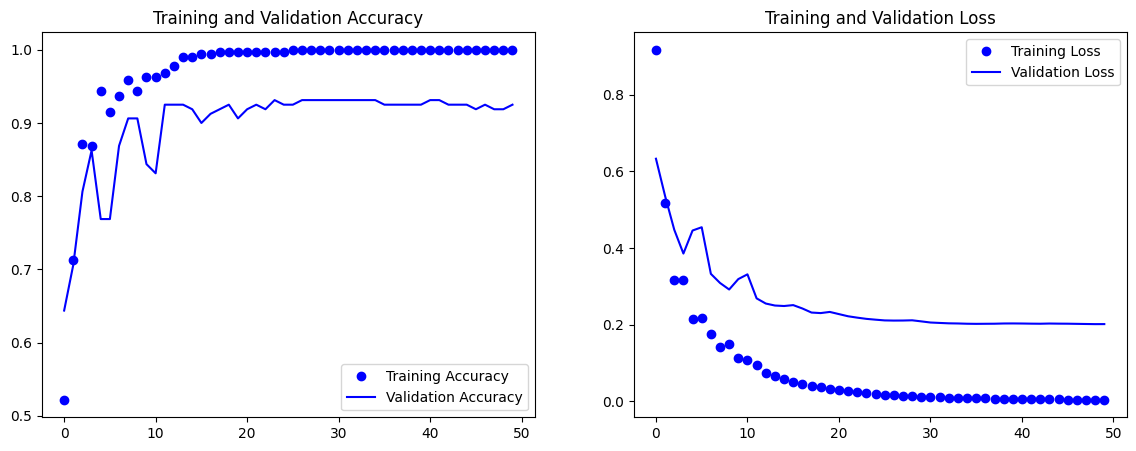

In [ ]:
import matplotlib.pyplot as plt

# Example of encapsulating plotting
def plot_training_history(history):
    accuracy = history.history['accuracy']
    val_accuracy = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs = range(len(accuracy))

    plt.figure(figsize=(14, 5))
    plt.subplot(1, 2, 1)
    plt.plot(epochs, accuracy, 'bo', label='Training Accuracy')
    plt.plot(epochs, val_accuracy, 'b', label='Validation Accuracy')
    plt.title('Training and Validation Accuracy')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(epochs, loss, 'bo', label='Training Loss')
    plt.plot(epochs, val_loss, 'b', label='Validation Loss')
    plt.title('Training and Validation Loss')
    plt.legend()
    plt.show()

plot_training_history(history)


In [ ]:
label_counts = np.unique(test_generator.classes, return_counts=True)
label_names = [list(test_generator.class_indices.keys())[list(test_generator.class_indices.values()).index(i)] for i in label_counts[0]]
print(dict(zip(label_names, label_counts[1])))

{'LAKI-LAKI': 20, 'PEREMPUAN': 20}


1/1 [==============================] - 1s 648ms/step
Confusion Matrix:
[[201  15]
 [  8 208]]
Classification Report:
              precision    recall  f1-score   support

   Laki-Laki       0.96      0.93      0.95       216
   Perempuan       0.93      0.96      0.95       216

    accuracy                           0.95       432
   macro avg       0.95      0.95      0.95       432
weighted avg       0.95      0.95      0.95       432



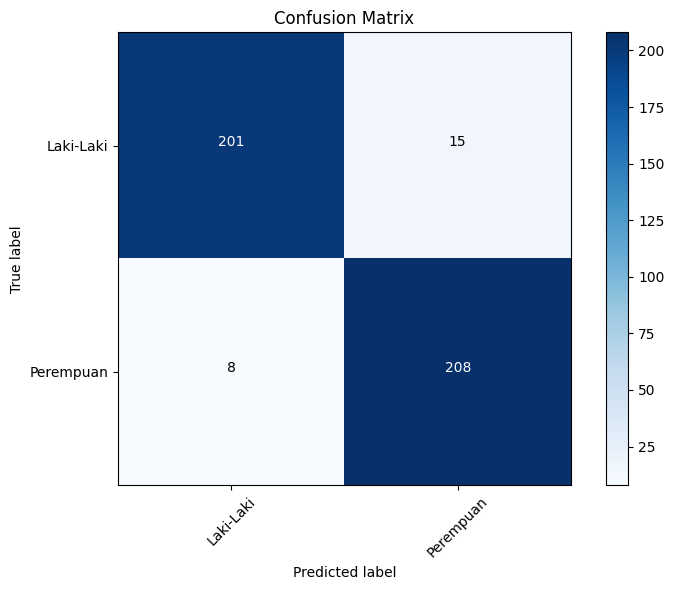

In [ ]:
# Define a custom object scope that includes the KerasLayer from TensorFlow Hub
custom_objects = {'KerasLayer': hub.KerasLayer}

# Load model with custom object scope
model_path = '/content/drive/My Drive/model_data_mobilenet.h5'
with tf.keras.utils.custom_object_scope(custom_objects):
    model = load_model(model_path)


# Mengumpulkan prediksi dan label aktual dari seluruh data pengujian
true_classes = []
predicted_classes = []

# Iterate through the entire test generator and collect true and predicted classes
for i in range(len(validation_generator)):
    X_images_train, y_train = validation_generator[i]
    true_classes.extend(np.argmax(y_train, axis=1))
    predicted_classes.extend(np.argmax(model.predict(X_images_train), axis=1))

true_classes = np.array(true_classes)
predicted_classes = np.array(predicted_classes)

# Definisikan class_labels
class_labels = ['Laki-Laki', 'Perempuan']

# Buat confusion matrix
conf_matrix = confusion_matrix(true_classes, predicted_classes)
print("Confusion Matrix:")
print(conf_matrix)

# Buat classification report
report = classification_report(true_classes, predicted_classes, target_names=class_labels)
print("Classification Report:")
print(report)

# Visualisasi confusion matrix
plt.figure(figsize=(8, 6))
plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = range(len(class_labels))
plt.xticks(tick_marks, class_labels, rotation=45)
plt.yticks(tick_marks, class_labels)

# Tambahkan nilai ke plot
thresh = conf_matrix.max() / 2.
for i, j in itertools.product(range(conf_matrix.shape[0]), range(conf_matrix.shape[1])):
    plt.text(j, i, format(conf_matrix[i, j], 'd'),
             horizontalalignment="center",
             color="white" if conf_matrix[i, j] > thresh else "black")

plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.tight_layout()
plt.show()


1/1 [==============================] - 1s 994ms/step
Predicted class: Perempuan


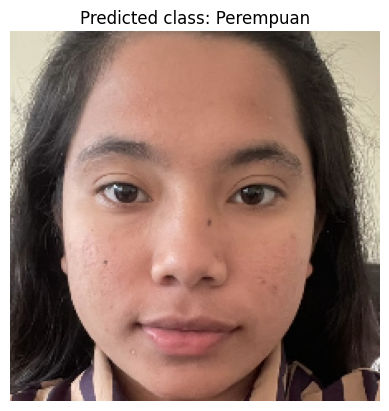

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import tensorflow_hub as hub
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

# Define a custom object scope that includes the KerasLayer from TensorFlow Hub
custom_objects = {'KerasLayer': hub.KerasLayer}

# Load model with custom object scope
model_path = '/content/drive/My Drive/model_data_mobilenet.h5'
with tf.keras.utils.custom_object_scope(custom_objects):
    model = load_model(model_path)

# Load and preprocess the test image
img_path = '/content/drive/My Drive/Data-test/PEREMPUAN/11S23007_Jelita Sibarani_Pencahayaan Normal.jpg'
img = image.load_img(img_path, target_size=(224, 224))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)  # Create batch axis
img_array /= 255.0  # Rescale the image

# Predict the class
predicted_class = np.argmax(model.predict(img_array), axis=1)

# Definisikan class_labels
class_labels = ['Laki-Laki', 'Perempuan']

# Print the predicted class
print(f"Predicted class: {class_labels[predicted_class[0]]}")

# Display the image along with the predicted class
plt.imshow(img)
plt.title(f"Predicted class: {class_labels[predicted_class[0]]}")
plt.axis('off')
plt.show()
